In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data da entrega : 27/02

Complete o código (marcado com None) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver None, substitua pelo seu código. Execute todo notebook e salve tudo em um PDF nomeado como "NomeSobrenome-P1.pdf".

In [ ]:
# mount your drive

In [3]:
def no_dominated(pontos):
    """
    Determina os pontos não dominados de Pareto
    
    Input: 
    pontos = DataFrame com as colunas 'f1' e 'f2'

    Output:
    nd_pontos = DataFrame com os pontos não dominados
    """
    
    nd_pontos = pd.DataFrame(columns=['f1', 'f2'])
    
    N = len(pontos)
    
    while N != 0:
        current_point = pontos.iloc[0]
        is_dominated = False
    
        for i in range(N):
            if all(current_point >= pontos.iloc[i]):
                is_dominated = True
                break
    
        if not is_dominated:
            nd_pontos = nd_pontos.append(current_point)
    
        # Atualize os pontos excluindo os dominados
        pontos = pontos[~pontos.apply(lambda x: all(current_point >= x), axis=1)]
        N = len(pontos)
    
    return nd_pontos

In [4]:
pontos = pd.read_csv('sample_500.csv', index_col=0) # leia as instâncias de teste
pontos.rename({"0": "f1", "1": "f2"}, axis=1, inplace=True)

pontos_2 = pd.read_csv('sample_500_2.csv', index_col=0)
pontos_2.rename({"0": "f1", "1": "f2"}, axis=1, inplace=True)

In [5]:
# execute sua função no_dominated
pontos_nao_dominados = no_dominated(pontos)

pontos_nao_dominados_2 = no_dominated(pontos_2)

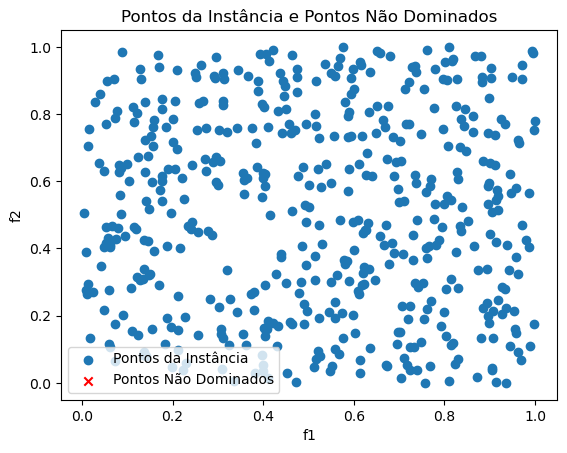

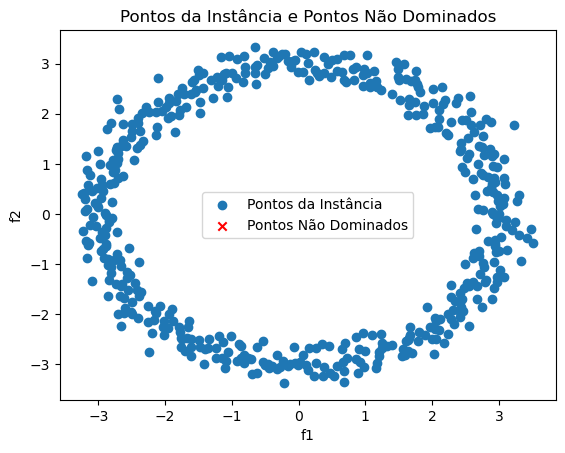

In [6]:
# Plot os pontos da instância
plt.scatter(pontos['f1'], pontos['f2'], label='Pontos da Instância')

# Plot os pontos não dominados
plt.scatter(pontos_nao_dominados['f1'], pontos_nao_dominados['f2'], label='Pontos Não Dominados', c='red', marker='x')

plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.title('Pontos da Instância e Pontos Não Dominados')
plt.show()

#--------------------------------------------------------------------------------------------------

# Plot os pontos da instância
plt.scatter(pontos_2['f1'], pontos_2['f2'], label='Pontos da Instância')

# Plot os pontos não dominados
plt.scatter(pontos_nao_dominados_2['f1'], pontos_nao_dominados_2['f2'], label='Pontos Não Dominados', c='red', marker='x')

plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.title('Pontos da Instância e Pontos Não Dominados')
plt.show()